In [220]:
# Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [221]:
# Add CSV
df = pd.read_csv("../Resources/mental_health_and_technology_usage_2024.csv")
df

,User_ID,Age,Gender,Social_Media_Usage_Hours,Gaming_Hours,Combined_Usage_Hours,Mental_Health_Status,Stress_Level,Sleep_Hours,Physical_Activity_Hours,Support_Systems_Access,Work_Environment_Impact,Online_Support_Usage
0,USER-00001,21,Male,7.81,4.08,11.89,Poor,High,7.22,2.00,No,Negative,No
1,USER-00002,45,Male,3.64,2.34,5.98,Poor,High,6.15,9.60,No,Neutral,Yes
2,USER-00003,30,Male,5.52,0.29,5.81,Poor,High,8.91,4.39,Yes,Positive,Yes
3,USER-00004,25,Female,2.06,2.75,4.81,Poor,High,4.00,5.05,Yes,Positive,No
4,USER-00005,18,Male,3.78,1.16,4.94,Poor,High,4.14,9.55,No,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,USER-09996,35,Female,2.71,4.91,7.62,Poor,High,6.15,0.74,No,Negative,No
9996,USER-09997,35,Male,6.32,3.01,9.33,Poor,High,4.47,7.72,Yes,Positive,No
9997,USER-09998,40,Male,1.48,2.88,4.36,Fair,Medium,6.67,5.52,Yes,Neutral,Yes
9998,USER-09999,21,Male,4.66,4.39,9.05,Poor,High,4.42,0.81,No,Positive,No


In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   User_ID                   10000 non-null  object 
 1   Age                       10000 non-null  int64  
 2   Gender                    10000 non-null  object 
 3   Social_Media_Usage_Hours  10000 non-null  float64
 4   Gaming_Hours              10000 non-null  float64
 5   Combined_Usage_Hours      10000 non-null  float64
 6   Mental_Health_Status      10000 non-null  object 
 7   Stress_Level              10000 non-null  object 
 8   Sleep_Hours               10000 non-null  float64
 9   Physical_Activity_Hours   10000 non-null  float64
 10  Support_Systems_Access    10000 non-null  object 
 11  Work_Environment_Impact   10000 non-null  object 
 12  Online_Support_Usage      10000 non-null  object 
dtypes: float64(5), int64(1), object(7)
memory usage: 1015.8+ KB


In [223]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# Load the data
file_path = ("../Resources/mental_health_and_technology_usage_2024.csv")  # Replace with your file path
data = pd.read_csv(file_path)

In [224]:
# Clean the data
data = data.dropna(subset=['Combined_Usage_Hours', 'Age', 'Gender'])
data
data['Age'] = data['Age'].astype(int)  # Ensure Age is integer for grouping

In [225]:
# Calculate the average combined usage hours by Age and Gender
combined_usage_by_age_gender = data.groupby(['Age', 'Gender'])['Combined_Usage_Hours'].mean().reset_index()
combined_usage_by_age_gender

,Age,Gender,Combined_Usage_Hours
0,15,Female,6.407476
1,15,Male,6.518268
2,18,Female,6.522144
3,18,Male,6.574421
4,21,Female,6.491244
5,21,Male,6.604707
6,25,Female,6.603916
7,25,Male,6.386761
8,30,Female,6.297044
9,30,Male,6.372076


In [259]:
# Group data by Mental_Health_Status and calculate average Combined_Usage_Hours
mental_health_summary = data.groupby("Mental_Health_Status").agg(
    {"Combined_Usage_Hours": "mean"}
).reset_index()

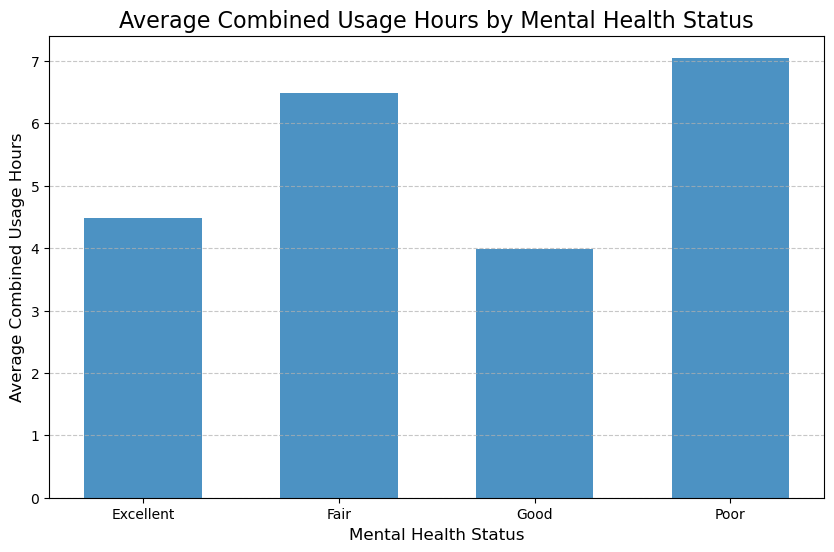

In [261]:
# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(
    mental_health_summary["Mental_Health_Status"],
    mental_health_summary["Combined_Usage_Hours"],
    alpha=0.8,
    width=0.6
)

# Add labels and title
plt.title("Average Combined Usage Hours by Mental Health Status", fontsize=16)
plt.xlabel("Mental Health Status", fontsize=12)
plt.ylabel("Average Combined Usage Hours", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [226]:
# Group the data by Combined Usage Hours, Age, and Gender
grouped_data = data.groupby(['Combined_Usage_Hours', 'Age', 'Gender']).size().reset_index(name='Count')

In [227]:
# Create a pivot table for the heatmap
pivot_table = data.pivot_table(
    values="Combined_Usage_Hours",
    index="Age",
    columns="Gender",
    aggfunc="mean"
)

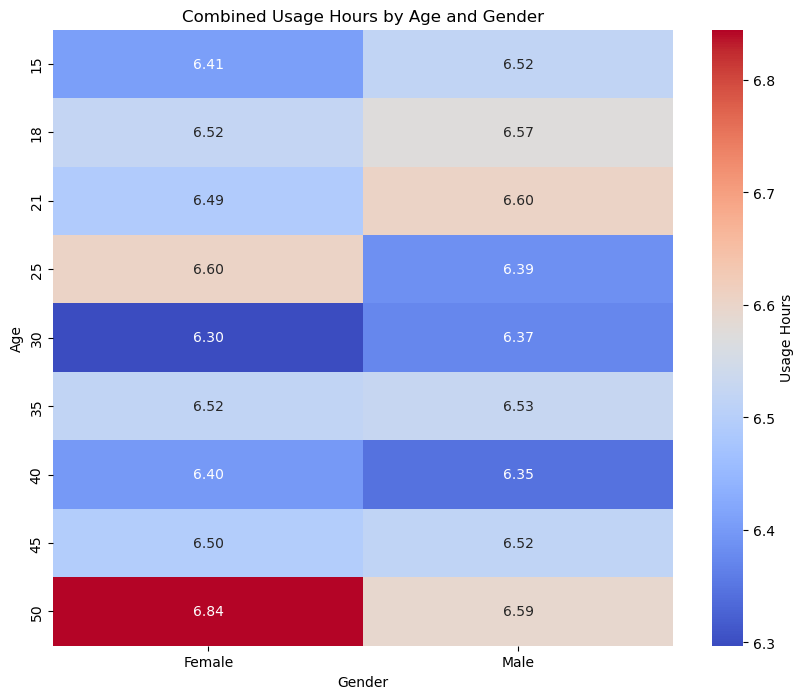

In [228]:
# Generate the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Usage Hours'})
plt.title("Combined Usage Hours by Age and Gender")
plt.xlabel("Gender")
plt.ylabel("Age")
plt.show()

In [229]:
# Group the data by Age, Gender, and Stress Level, and calculate mean Combined Usage Hours
grouped_data = data.groupby(["Age", "Gender", "Stress_Level"]).agg(
    {"Combined_Usage_Hours": "mean"}
).reset_index()

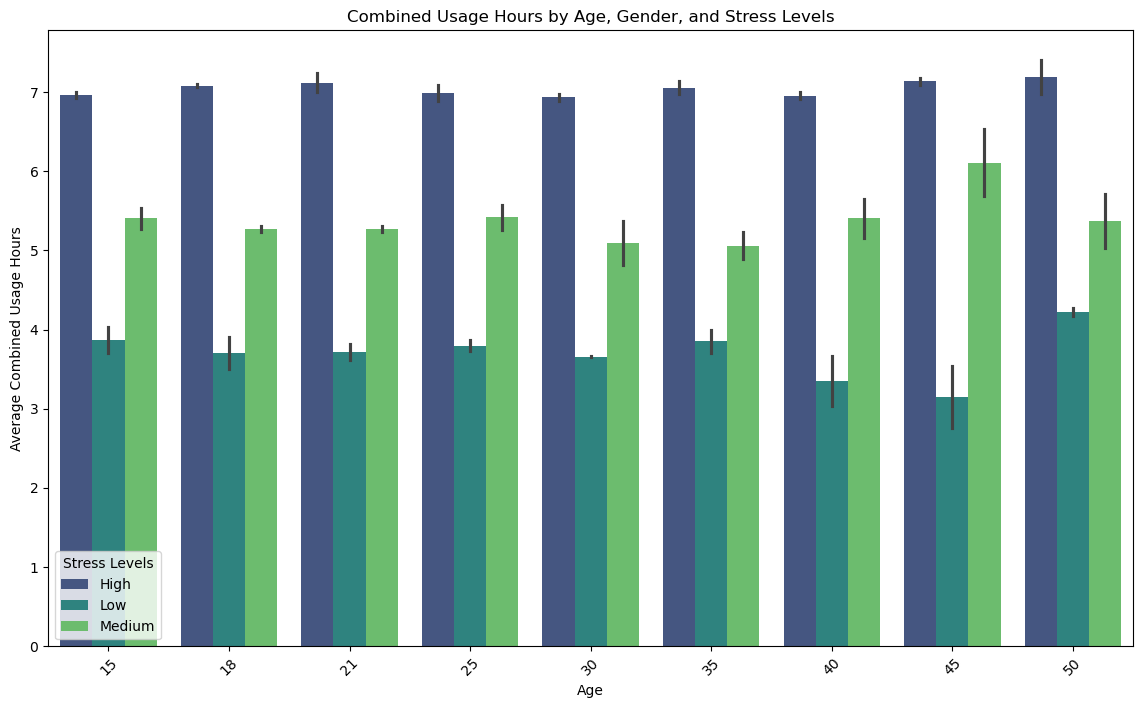

In [257]:
# Create a bar plot to visualize the relationships
plt.figure(figsize=(14, 8))
sns.barplot(
    data=grouped_data,
    x="Age",
    y="Combined_Usage_Hours",
    hue="Stress_Level",
    palette="viridis"
)
plt.title("Combined Usage Hours by Age, Gender, and Stress Levels")
plt.xlabel("Age")
plt.ylabel("Average Combined Usage Hours")
plt.legend(title="Stress Levels")
plt.xticks(rotation=45)
plt.show()

In [231]:
# Bin combined usage hours into categories
usage_bins = pd.cut(
    data["Combined_Usage_Hours"],
    bins=[0, 5, 10, 15, 20, float('inf')],
    labels=["0-5", "6-10", "11-15", "16-20", "20+"]
)

In [232]:
# Bin ages into categories
age_bins = pd.cut(data['Age'], bins=[0, 18, 30, 45, 60, 100], labels=["0-18", "19-30", "31-45", "46-60", "60+"])

In [233]:
# Chi-Square Test for Combined Usage Hours and Gender
contingency_table_gender_usage = pd.crosstab(usage_bins, data['Gender'])
chi2_stat_gender_usage, p_value_gender_usage, dof_gender_usage, expected_gender_usage = chi2_contingency(contingency_table_gender_usage)

print("Chi-Square Test: Gender vs Combined Usage Hours")
print(f"Chi-Square Statistic: {chi2_stat_gender_usage}")
print(f"P-Value: {p_value_gender_usage}")
print(f"Degrees of Freedom: {dof_gender_usage}")
print("Expected Frequencies:")
print(expected_gender_usage)
print("\n")


Chi-Square Test: Gender vs Combined Usage Hours
Chi-Square Statistic: 4.945519437764865
P-Value: 0.08435175037409781
Degrees of Freedom: 2
Expected Frequencies:
[[1608.8328 1568.1672]
 [2900.1528 2826.8472]
 [ 555.0144  540.9856]]




In [234]:
# Chi-Square Test for Combined Usage Hours and Age
contingency_table_age_usage = pd.crosstab(usage_bins, age_bins)
chi2_stat_age_usage, p_value_age_usage, dof_age_usage, expected_age_usage = chi2_contingency(contingency_table_age_usage)

print("Chi-Square Test: Age vs Combined Usage Hours")
print(f"Chi-Square Statistic: {chi2_stat_age_usage}")
print(f"P-Value: {p_value_age_usage}")
print(f"Degrees of Freedom: {dof_age_usage}")
print("Expected Frequencies:")
print(expected_age_usage)

Chi-Square Test: Age vs Combined Usage Hours
Chi-Square Statistic: 4.66181513439534
P-Value: 0.5878596013846442
Degrees of Freedom: 6
Expected Frequencies:
[[ 809.1819 1744.4907  567.0945   56.2329]
 [1458.6669 3144.6957 1022.2695  101.3679]
 [ 279.1512  601.8136  195.636    19.3992]]


In [235]:
# Calculate the mean Combined Usage Hours for each Age and Gender
trend_data = data.groupby(["Age", "Gender"]).agg({"Combined_Usage_Hours": "mean"}).reset_index()
trend_data

,Age,Gender,Combined_Usage_Hours
0,15,Female,6.407476
1,15,Male,6.518268
2,18,Female,6.522144
3,18,Male,6.574421
4,21,Female,6.491244
5,21,Male,6.604707
6,25,Female,6.603916
7,25,Male,6.386761
8,30,Female,6.297044
9,30,Male,6.372076


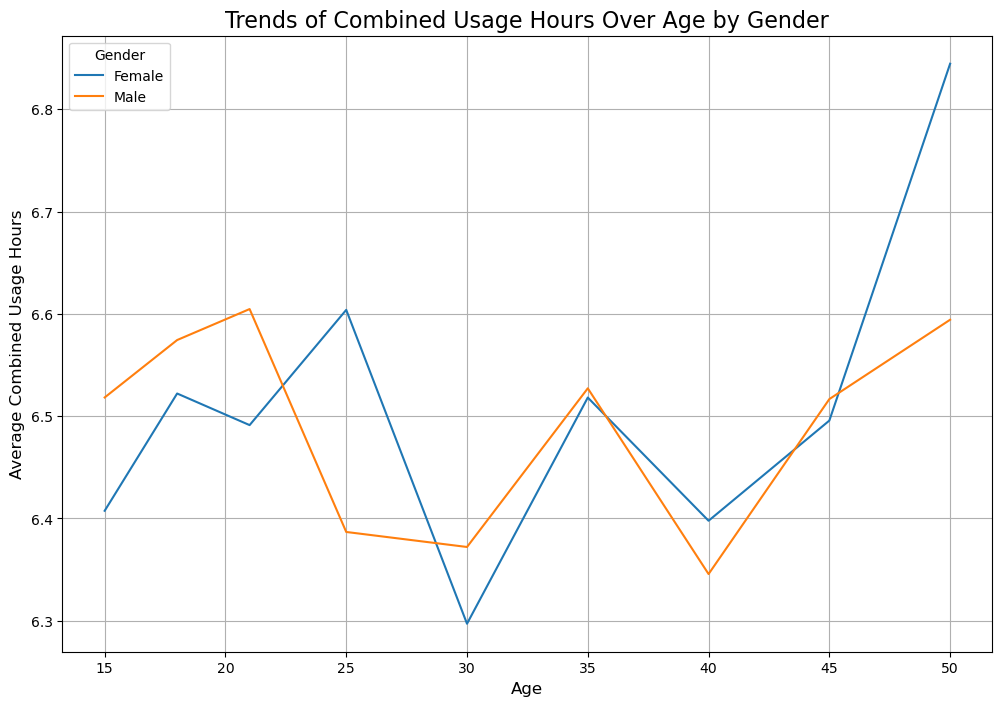

In [236]:
# Create a line plot
plt.figure(figsize=(12, 8))
for gender in trend_data["Gender"].unique():
    gender_data = trend_data[trend_data["Gender"] == gender]
    plt.plot(
        gender_data["Age"],
        gender_data["Combined_Usage_Hours"],
        label=gender
    )

# Add labels, title, and legend
plt.title("Trends of Combined Usage Hours Over Age by Gender", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Average Combined Usage Hours", fontsize=12)
plt.legend(title="Gender")
plt.grid(True)
plt.show()